### Student Name: Cathal Cronin

### Student ID: 10131531

I followed a mix of online sites and the tutorial linked in the module material.
https://machinelearningmastery.com/calculate-principal-component-analysis-scratch-python/

Also from my class mates I've taken snippets that were nicer than how I was originally doing it for eaiser readbility, like the sorting of the eigenvectors for examples or the types of plots being used in matplotlib. Without some of the feedback on the forum I wouldn't have been able to get as far as I did with the problem.

- The 'as' keyword allows you to invoke functionality from the module using an alias for the module name. For example: np.mean() instead of numpy.mean()
- The from keyword allows you to only import the functionality of interest, for example above we import only the PCA class from the sklearn.decomposition module

In [1]:
import numpy as np
import random as rand
import matplotlib.pyplot as plt
from numpy.linalg import eig
from sklearn.decomposition import PCA

As per E-tivity instructions: Use of the matrix class is discouraged, but to allow us to simplify the code slightly, we will use it this week. Its first use will be to store the data that you will perform the PCA transform on. Note that you will likely obtain a higher score if your final version does not use the matrix class.

In [2]:
a_x = 0.05
a_y= 10

In [3]:
# Set the random seed so the results stay they same between runs for testing and debugging
rand.seed(4021)
data =  np.matrix([[n*(1+a_x*(rand.random()-0.5)),4*n+ a_y*(rand.random()-0.5)] for n in range(20)])
data

matrix([[ 0.        ,  4.12972485],
        [ 0.99281377,  1.58287669],
        [ 1.95143748,  4.1798439 ],
        [ 3.04111748, 12.45493627],
        [ 3.95025557, 11.97635406],
        [ 4.95486338, 16.5017806 ],
        [ 6.08648276, 20.30549485],
        [ 7.06423237, 31.44971399],
        [ 8.01881302, 27.67927465],
        [ 9.03871466, 32.77405678],
        [10.17349883, 38.15103938],
        [11.06982859, 48.13750985],
        [11.71936374, 52.43480246],
        [12.94949289, 49.69674428],
        [13.95921108, 54.25310367],
        [14.79135268, 57.17610137],
        [16.20294736, 60.65884926],
        [17.15125516, 72.56742162],
        [17.78685132, 67.18445251],
        [18.80837559, 72.69621284]])

The numpy shape property is very useful to get an insight in the dimensions of your data, for example to check whether the features (in this case 2) or the samples (in this case 20) are in the rows or the columns. The notation used here (with columns containing the features and rows containing separate examples) is the standard for Scikitlearn and many other machine learning algorithms.


In [4]:
data.shape

(20, 2)

In [5]:
class PCA_10131531:
    
    def __init__(self, n_components=2):
        self.n_components = n_components
        self.eigenvectors = None
        self.eigenvalues = None
        self.eig_pairs = None
        self.data = None
        self.centered_data = None
        
    def fit(self, data):
        """Get eigenvectors and eigenvalues on the dataset provided"""
        self.data = data
        
        # Subtract the mean from each column of the dataset
        means = np.mean(self.data, axis=0)
        self.centered_data = self.data - means
        
        # Calculate the covariance matrix
        cov_matrix = np.cov(self.centered_data, rowvar=False)
        
        # Calculate the eigenvectors and eigenvalues based on covariance matrix
        self.eigenvalues, self.eigenvectors = eig(cov_matrix)
        
        #         Tried a few different methods to sort the eigenvectors, in the end I like how one class 
        #         mate was solving it in an elegant way.
        #         # Make a list of (eigenvalue, eigenvector) tuples
        #         eig_pairs = [(np.abs(self.eigenvalues[i]), self.eigenvectors[:,i]) for i in range(len(self.eigenvalues))]
        #         print(self.eigenvalues)
        #         sorted_eigen_valies = sorted(self.eigenvalues, reverse=True)

        #         print(eig_pairs)
        #         # Sort the (eigenvalue, eigenvector) tuples from high to low
        #         eig_pairs = sorted(eig_pairs, key=lambda x: x[0])
        #         eig_pairs.reverse()
        #         self.eig_pairs = eig_pairs

        #         # Visually confirm that the list is correctly sorted by decreasing eigenvalues
        #         print('Eigenvalues in descending order:')
        #         for i in eig_pairs:
        #             print(i)

        #         print('sorted eigenvalues')
        #         print(sorted_eigen_valies)
        
        # Sort eigenvectors by the absolute value, magnitude matters not sign here.
        sorted_eigen_values_indexes = np.abs(self.eigenvalues).argsort()[::-1]
        sorted_eigen_values = self.eigenvalues[sorted_eigen_values_indexes]
        sorted_eigen_vectors = self.eigenvectors.T[sorted_eigen_values_indexes]
        self.eigenvalues = sorted_eigen_values[:self.n_components]
        self.eigenvectors = sorted_eigen_vectors.T[:self.n_components,:]
        
        return self.eigenvalues, self.eigenvectors
    
    def transform(self):
        """Reduce dimensionality of data give a list of eigenvectors and eigenvalues"""
        feature_matrix = self.eigenvectors
        projected_data = self.centered_data.dot(feature_matrix.T)
        
        return projected_data
    
    def inverse_transform(self, transformed_data):
        """Transform the projected data back to it's orignal starting state"""
        original_data = transformed_data.dot(self.eigenvectors) + self.means
    
        
        
    
    

I've seen people squaring the eigenvector to remove the sign but taking the absolute value should and does work from what I can see it returns the correct order of eigenvectors. 

In [6]:
# Create instance of library based PCA
sklearn = PCA(n_components=2)
sklearn.fit(data)
sklearn_transform = sklearn.transform(data)
sklearn_eigenvectors = sklearn.components_
sklearn_eigenvalues = sklearn.explained_variance_

# Create instance of my custom PCA
custom_pca = PCA_10131531(n_components=2)
custom_pca_eigenvalues, custom_pca_eigenvectors = custom_pca.fit(data)
custom_pca_transform = custom_pca.transform()

In [8]:
# As required for the assignment, below I compare my custom PCA class with the scikit's one.
print("Custom PCA eigen vectors: \n%s\n" % (custom_pca_eigenvectors))
print("scikit PCA eigen vectors: \n%s\n" % (sklearn_eigenvectors))

Custom PCA eigen vectors: 
[[-0.2387596  -0.97107871]
 [-0.97107871  0.2387596 ]]

scikit PCA eigen vectors: 
[[ 0.2387596   0.97107871]
 [-0.97107871  0.2387596 ]]



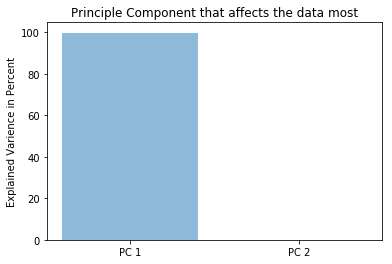

In [9]:
# Calculate the weight of each of eigenvectors.
# This indicates how much each eigenvector or principle component affects the data.
tot = sum(custom_pca_eigenvalues)
var_exp = [(i / tot)*100 for i in sorted(custom_pca_eigenvalues, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

objects = ('PC 1', 'PC 2')
y_pos = np.arange(len(custom_pca_eigenvalues))
performance = custom_pca_eigenvectors

plt.bar(y_pos, var_exp, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Explained Varience in Percent')
plt.title('Principle Component that affects the data most')
 
plt.show()

Vectors are the same but the signs are different for the scikit vectors, this is bellieved to be because of the way the calculations are performed internally.

The eigenvector with the highest eigenvalue is the principle component of the dataset. 

We can see in the above that PC1 affects the data most so when doing the transform we can remove and not use PC 2 because it does not affect the data really.

With principle components found. Next step is to reduce the dimensionality of the data by creating a `feature vector`. This feature vector is really a matrix of vectors. 

It is constructed by taking the eigenvectors you want to keep from the list of eigenvectors you found.

By taking a subset of all the eigenvectors you can reduce the dimensionality without too much loss in overall data. 

In [10]:
print("Custom PCA eigen values: \n%s\n" % (custom_pca_eigenvalues))
print("scikit PCA eigen values: \n%s\n" % (sklearn_eigenvectors))

Custom PCA eigen values: 
[597.93953654   0.64418848]

scikit PCA eigen values: 
[[ 0.2387596   0.97107871]
 [-0.97107871  0.2387596 ]]



My PCA class and scikit's class both return the same eigenvalues. 

In [11]:
print("Custom PCA Transform: \n%s\n" % (custom_pca_transform))
print("scikit PCA Transform: \n%s\n" % (sklearn_transform))

Custom PCA Transform: 
[[ 33.98970226   1.41098532]
 [ 36.22584847  -0.16119943]
 [ 33.4751083   -0.47204765]
 [ 25.17917074   0.44554501]
 [ 25.42684629  -0.55156572]
 [ 20.79244118  -0.44662996]
 [ 16.82855029  -0.63734818]
 [  5.77318927   1.07396926]
 [  9.20666733  -0.75323226]
 [  4.01572159  -0.5272089 ]
 [ -1.47669233  -0.34536746]
 [-11.38834849   1.16859146]
 [-15.71644059   1.56386155]
 [-13.35127574  -0.28442833]
 [-18.01693923  -0.17706965]
 [-21.05408185  -0.28725088]
 [-24.77313595  -0.82648094]
 [-36.56371458   1.09592348]
 [-31.48818258  -0.80652596]
 [-37.08443439  -0.48252075]]

scikit PCA Transform: 
[[-33.98970226   1.41098532]
 [-36.22584847  -0.16119943]
 [-33.4751083   -0.47204765]
 [-25.17917074   0.44554501]
 [-25.42684629  -0.55156572]
 [-20.79244118  -0.44662996]
 [-16.82855029  -0.63734818]
 [ -5.77318927   1.07396926]
 [ -9.20666733  -0.75323226]
 [ -4.01572159  -0.5272089 ]
 [  1.47669233  -0.34536746]
 [ 11.38834849   1.16859146]
 [ 15.71644059   1.56386

### Assignment Objective 1: `Custom PCA Transform` vs `SK Learn PCA Output`
---

From the above output we can see that my custom PCA class is producing the same transform results as sk learn. The only difference I can see is the signs of the values are different. As mentioned briefly before, and from discussion on the forum the sign doesn't matter too much. What's most important is the magintude of the vector and the vector with the strongest weighting on the data. 

Below I compare the differences between the calcualted values and in the section following that I plot the points of my transform and sk leanrn. Interestingly because of the negative sign in the data, it gets plotted as an inverse image of the other but most importantly the data was transformed the same way as sk learn.

The below data is for n_components=2, n_components=1 is further down.

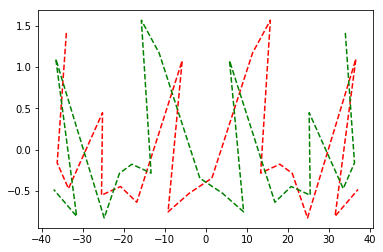

In [12]:
# Data Graphed When n_components=2
plt.plot(sklearn_transform[:, 0], sklearn_transform[:, 1], 'r--')
plt.plot(custom_pca_transform[:, 0], custom_pca_transform[:, 1], 'g--')

Below we can see that the vectors are indeed the same. Again the reason the point in different directions is because of the sign of the vectors and values returned by my method.



In [ ]:
# Took this plot from a classmate @Cormac. I liked how it visualises the eigenvectors and shows that they have to be orthogonal to each other
origin = (0, 0)
plt.quiver(*origin, *sklearn_eigenvectors, color=['r'], scale=3, alpha=0.7)
plt.quiver(*origin, *custom_pca_eigenvectors, color=['g'], scale=3)
plt.show()

### Assignment Objective 2: `Transformed Data` vs `Original Data`

From the data below we can see when compared and graphed against the original data set, the data is flattened to the main axis. From this we know PCA has been applied.

The below data is for n_components=2, n_components=1 is further down.

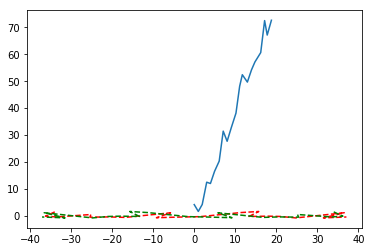

In [13]:
# Data Graphed When n_components=2
plt.plot(sklearn_transform[:, 0], sklearn_transform[:, 1], 'r--')
plt.plot(custom_pca_transform[:, 0], custom_pca_transform[:, 1], 'g--')
plt.plot(data[:, 0], data[:, 1])

### Setting n_components=1 and repeating the process above 

#### Assignment Objective 1: `Custom PCA Transform` vs `SK Learn PCA Output`

#### Assignment Objective 2: `Transformed Data` vs `Original Data`

In [18]:
# Create instance of library based PCA
sklearn = PCA(n_components=1)
sklearn.fit(data)
sklearn_transform = sklearn.transform(data)
sklearn_eigenvectors = sklearn.components_
sklearn_eigenvalues = sklearn.explained_variance_

# Create instance of my custom PCA
custom_pca = PCA_10131531(n_components=1)
custom_pca_eigenvalues, custom_pca_eigenvectors = custom_pca.fit(data)
custom_pca_transform = custom_pca.transform()

[[0.2387596  0.97107871]]
[[-0.2387596  -0.97107871]]


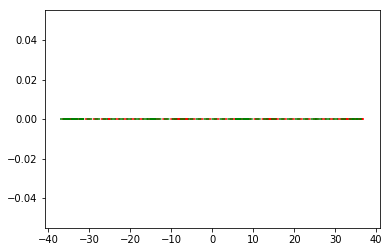

In [19]:
plt.plot(sklearn_transform[:, 0], np.zeros(sklearn_transform.shape), 'r--')
plt.plot(custom_pca_transform[:, 0],np.zeros(custom_pca_transform.shape), 'g--')
print(sklearn_eigenvectors)
print(custom_pca_eigenvectors)

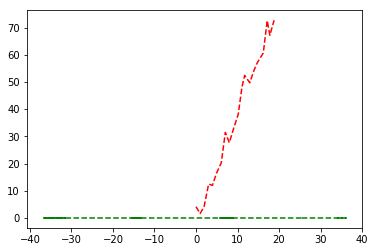

In [20]:
plt.plot(data[:,0], data[:,1], 'r--')
plt.plot(custom_pca_transform[:,0], np.zeros(custom_pca_transform.shape),'g--')
plt.show()

* From the graphs above we can see that the transform has flattened the data along the major x axis. 
* Both my custom class and the sk learn based one both give the same values and results except the sign is oppisite. This is similar to the result when n_components was set to 2. 
* From this we can say that only using 1 principle component from this data set is enough to get similar results. The original data gets shifted or projected towards it's major access based on the weight of the strongest eigenvector. 
* Finally, we were able to reduce the dimensionality of the data with very little loss in data. Again this can be seen from the histogram above showing the weighting of each principle component.

### Task Completion:

- [x] Create custom PCA class
- [x] Create a fit method
- [x] Create a transform method
- [x] Allow class to set the n_components
- [x] Store results of fit (eigenvectors, eigenvalues)
- [x] Don't use np matrix class
- [x] Respond to peers
- [x] Compare transformed data when using custom PCA vs sklearn based PCA where n_components=1
- [x] Compare transformed data vs original dataset using n_components=1